In [28]:
import bt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['SimHei']  # 设置字体为黑体

In [29]:
import pandas as pd
def get_data(symbol):
    data = pd.read_csv('data/{}.csv'.format(symbol))
    data['date'] = data['date'].apply(lambda x: str(x))
    data.set_index('date', inplace=True)
    data.sort_index(ascending=True, inplace=True)
    data.index = pd.to_datetime(data.index)
    return data

df_300 = get_data('000300.SH')
df_006 = get_data('399006.SZ')
df_300

,symbol,close,open,high,low,pre_close,change,pct_chg,volume,amount
date,,,,,,,,,,
2005-01-04,000300.SH,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,7.412869e+06,4.431977e+06
2005-01-05,000300.SH,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06
2005-01-06,000300.SH,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06
2005-01-07,000300.SH,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06
2005-01-10,000300.SH,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06
...,...,...,...,...,...,...,...,...,...,...
2024-08-29,000300.SH,3277.6812,3273.5410,3290.7857,3269.5288,3286.4956,-8.8144,-0.2682,1.307023e+08,1.743401e+08
2024-08-30,000300.SH,3321.4323,3273.7532,3351.6254,3273.6496,3277.6812,43.7511,1.3348,1.886954e+08,2.683760e+08
2024-09-02,000300.SH,3265.0110,3307.5432,3307.7627,3264.7565,3321.4323,-56.4213,-1.6987,1.476124e+08,1.944100e+08


In [30]:
# 合并dataframe
df = pd.concat([df_300,df_006])
df

,symbol,close,open,high,low,pre_close,change,pct_chg,volume,amount
date,,,,,,,,,,
2005-01-04,000300.SH,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,7.412869e+06,4.431977e+06
2005-01-05,000300.SH,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06
2005-01-06,000300.SH,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06
2005-01-07,000300.SH,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06
2005-01-10,000300.SH,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06
...,...,...,...,...,...,...,...,...,...,...
2024-08-29,399006.SZ,1541.3995,1512.3709,1551.5399,1512.1710,1531.4502,9.9493,0.6497,1.438497e+08,1.653971e+08
2024-08-30,399006.SZ,1580.4595,1543.8935,1601.1559,1543.8935,1541.3995,39.0600,2.5341,2.017268e+08,2.279659e+08
2024-09-02,399006.SZ,1536.9499,1577.4449,1581.8685,1536.5258,1580.4595,-43.5096,-2.7530,1.614146e+08,1.768051e+08


In [31]:
df_close = df.pivot_table(values='close', index=df.index, columns='symbol')
df_close.dropna(inplace=True)
df_close

symbol,000300.SH,399006.SZ
date,,
2010-06-01,2744.1620,973.2330
2010-06-02,2757.5270,997.1190
2010-06-03,2736.0760,998.3940
2010-06-04,2744.3910,1027.6810
2010-06-07,2695.7150,1069.4680
...,...,...
2024-08-29,3277.6812,1541.3995
2024-08-30,3321.4323,1580.4595
2024-09-02,3265.0110,1536.9499


In [32]:
# 创建策略
s_benchermark_1 = bt.Strategy('基准-沪深300', [bt.algos.RunOnce(),
                       bt.algos.SelectThese(tickers=['000300.SH']),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

s_benchermark_2 = bt.Strategy('基准-创业板', [bt.algos.RunOnce(),
                       bt.algos.SelectThese(tickers=['399006.SZ']),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

s_benchermark_3 = bt.Strategy('基准-等权', [bt.algos.RunOnce(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

s_benchermark_4 = bt.Strategy('基准-等波动率', [
                        bt.algos.RunAfterDays(20*6 + 1),                    
                        bt.algos.RunOnce(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighInvVol(),
                       bt.algos.Rebalance()])
import numpy as np
factor = df_close.pct_change(20)
signal = np.where(factor>0.02,1,np.nan)
signal = np.where(factor<-0.02,0,signal)
signal = pd.DataFrame(signal,df_close.index,columns=factor.columns)
signal = signal.ffill()
signal = signal.fillna(0)

class SelectTopK(bt.AlgoStack):
    def __init__(self, signal, K, sort_descending=True, all_or_none=False, filter_selected=True):
        super(SelectTopK, self).__init__(bt.algos.SetStat(signal),
                                         bt.algos.SelectN(K, sort_descending, all_or_none, filter_selected))

s= bt.Strategy('大小盘-趋势轮动', [               
                       bt.algos.RunDaily(),
                       bt.algos.SelectWhere(signal),
                       SelectTopK(signal,K=1),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])



stras = [s_benchermark_1,s_benchermark_2,s_benchermark_3,s_benchermark_4,s]

# 创建回测
bkts = [bt.Backtest(s, df_close) for s in stras]
res = bt.run(*bkts)

100%|██████████| 5/5 [00:04<00:00,  1.15it/s]


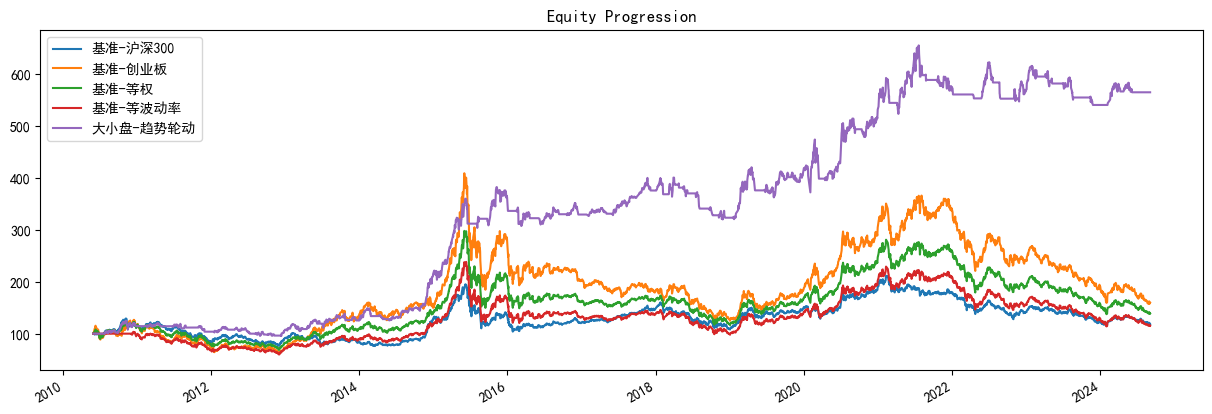

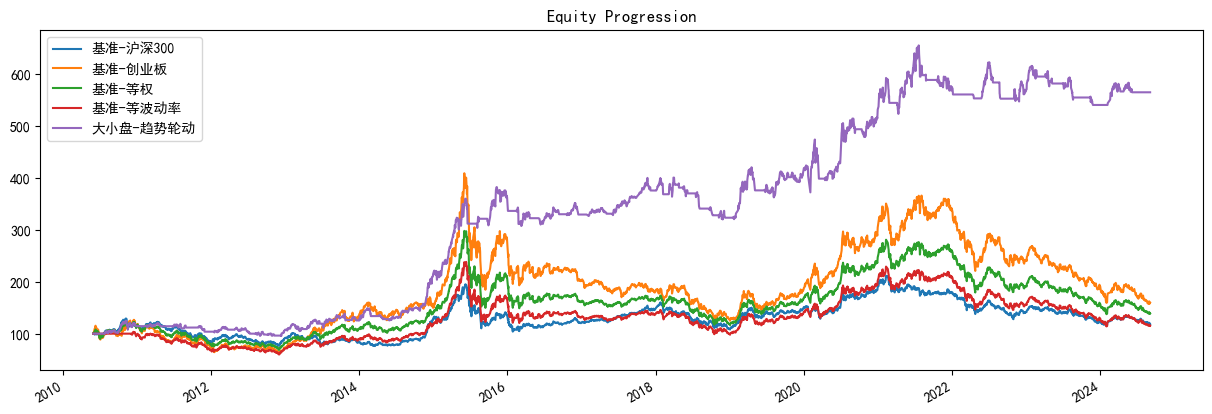

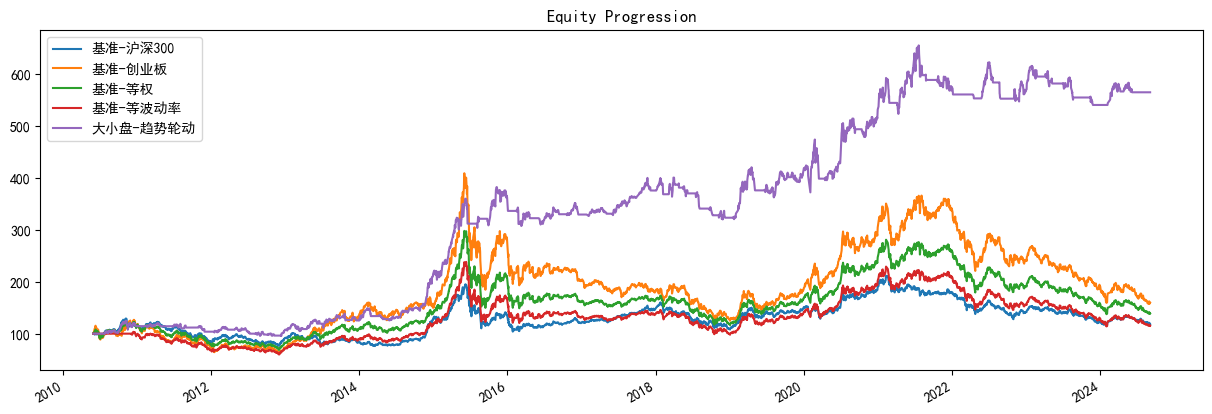

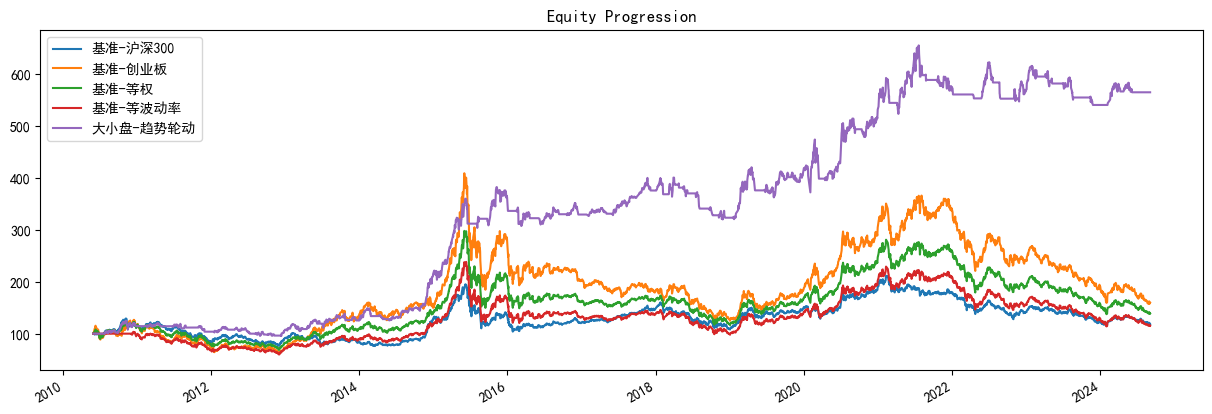

In [33]:
import matplotlib.pyplot as plt
res.plot()
plt.show()

In [34]:
res.stats

,基准-沪深300,基准-创业板,基准-等权,基准-等波动率,大小盘-趋势轮动
start,2010-05-31 00:00:00,2010-05-31 00:00:00,2010-05-31 00:00:00,2010-05-31 00:00:00,2010-05-31 00:00:00
end,2024-09-04 00:00:00,2024-09-04 00:00:00,2024-09-04 00:00:00,2024-09-04 00:00:00,2024-09-04 00:00:00
rf,0.0,0.0,0.0,0.0,0.0
total_return,0.184913,0.597104,0.390718,0.154354,4.649827
cagr,0.011966,0.033367,0.023392,0.010114,0.129073
max_drawdown,-0.466692,-0.697316,-0.609461,-0.589161,-0.235018
calmar,0.02564,0.047851,0.038381,0.017167,0.549202
mtd,-0.020835,-0.016332,-0.01825,-0.018627,0.0
three_month,-0.100451,-0.156693,-0.133568,-0.128815,-0.011488
six_month,-0.081464,-0.152668,-0.123682,-0.117682,-0.013011
